In [1]:
import os
import sys
import csv
import logging
import matplotlib.pyplot as plt
import pandas as pd

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..',))
sys.path.append(repo_root)

from src import *

In [2]:
# Process saved files
process_directory(os.getcwd(), 'ex01.1' , '01.1')
process_directory(os.getcwd(), 'ex01.2' , '01.2')
process_directory(os.getcwd(), 'ex01.3' , '01.3')

In [43]:

def group_results_df(averages_df, compared_axis):
    unique_train = averages_df['train'].unique()
    mean_results = []
    prop_results = []

    for _, group in averages_df.groupby(['train']):
        base_values = group.iloc[0, :]
  

        # Calculate mean against base, excluding 'train'
        mean_values = calculate_column_means_against_base(group, compared_axis)
        mean_values['train'] = base_values['train']  # Keep the original train value
        mean_results.append(mean_values)

        # Calculate proportion against base, excluding 'train'
        prop_values = calculate_percentages_against_base(group, compared_axis)
        prop_values['train'] = base_values['train']  # Keep the original train value
        prop_results.append(prop_values)

    mean_df = pd.DataFrame(mean_results)
    prop_df = pd.DataFrame(prop_results)

    return prop_df, mean_df

def plot_proportions(proportion_df, mean_df):

    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Assuming 'train' is the column for train size in both DataFrames
    train_size = proportion_df['train'].unique()
    
    # Plot proportions
    ax = axes[0]
    for column in proportion_df.columns:
        if column != 'train' and column != 'rep' and column != 'Game':
            ax.plot(train_size, proportion_df[column], label=column, marker='o')
    ax.hlines(y=.5, xmin=0, xmax=1, linestyles='--', color='grey', alpha=0.5)
    ax.set_xscale('log')
    ax.set_xlabel('Train Size')
    ax.set_ylabel('Proportion')
    ax.set_title('Model Proportions vs Train Size')
    ax.legend()
    
    # Plot means
    ax = axes[1]
    for column in mean_df.columns:
        if column != 'train' and column != 'rep' and column != 'Game':
            ax.plot(train_size, mean_df[column], label=column, marker='s')
            
    ax.set_xscale('log')
    ax.set_xlabel('Train Size')
    ax.set_ylabel('Mean')
    ax.set_title('Model Means vs Train Size')
    ax.legend()
    
    plt.tight_layout()
    plt.show()


# Standard 

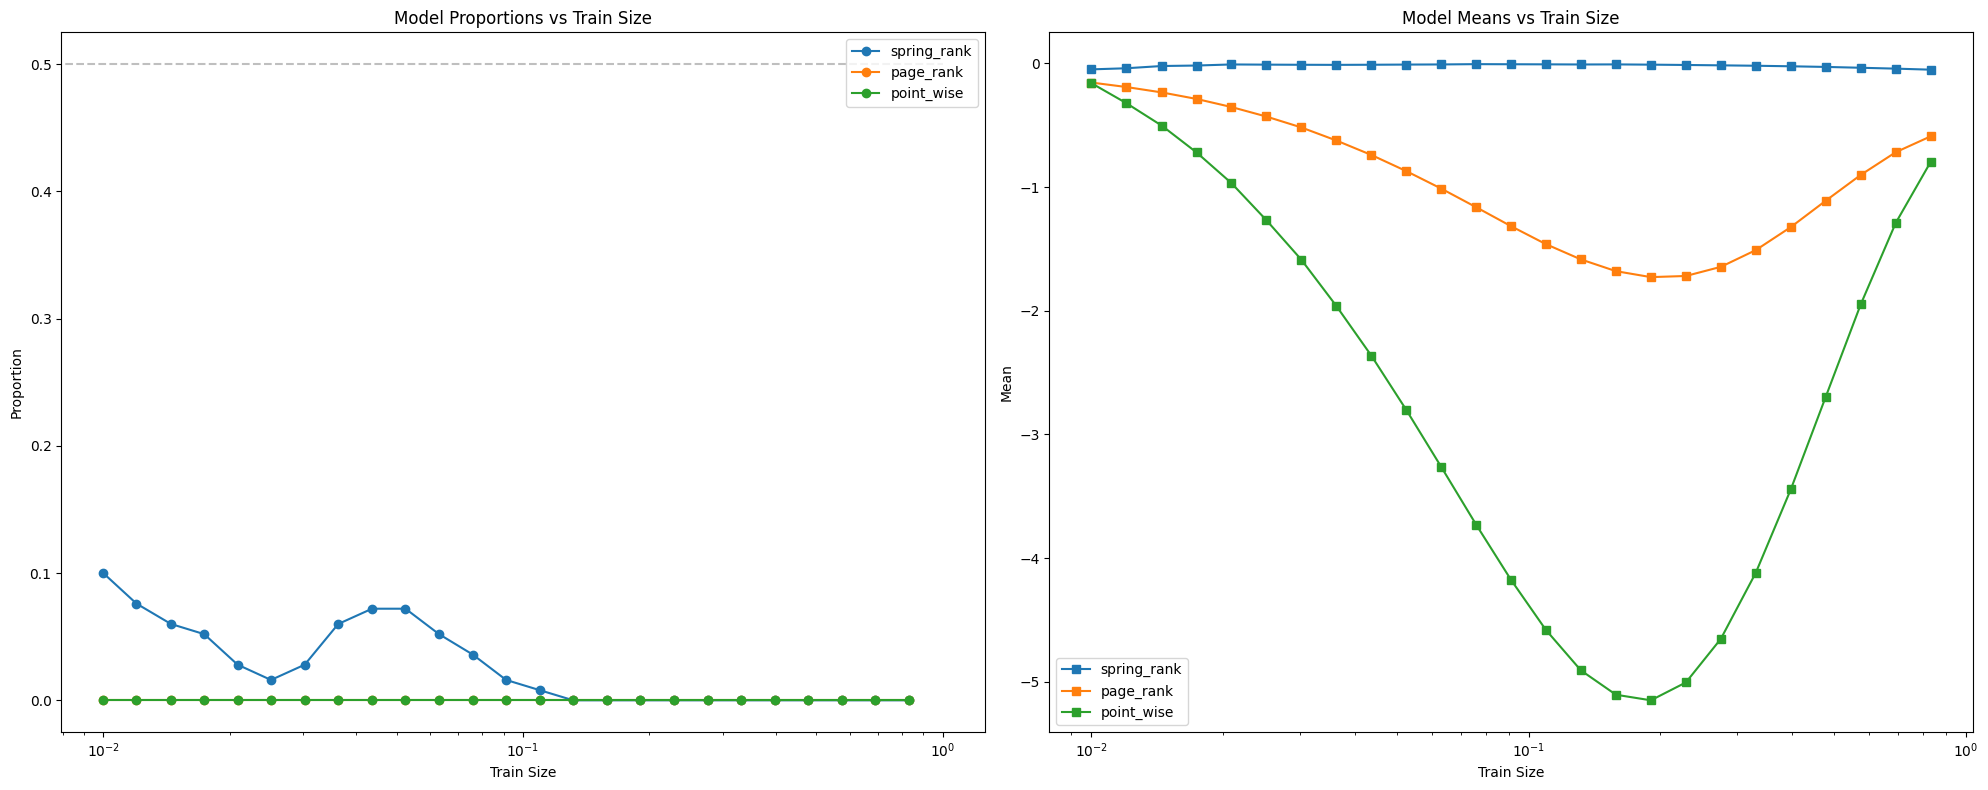

In [44]:
averages_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '01.1_results.csv'))
mean, prop = group_results_df(averages_df, 0)
mean_df = mean[['spring_rank', 'page_rank', 'point_wise', 'train']]
prop_df = prop[['spring_rank', 'page_rank', 'point_wise', 'train']]
plot_proportions(mean_df, prop_df)



# Higher Order 

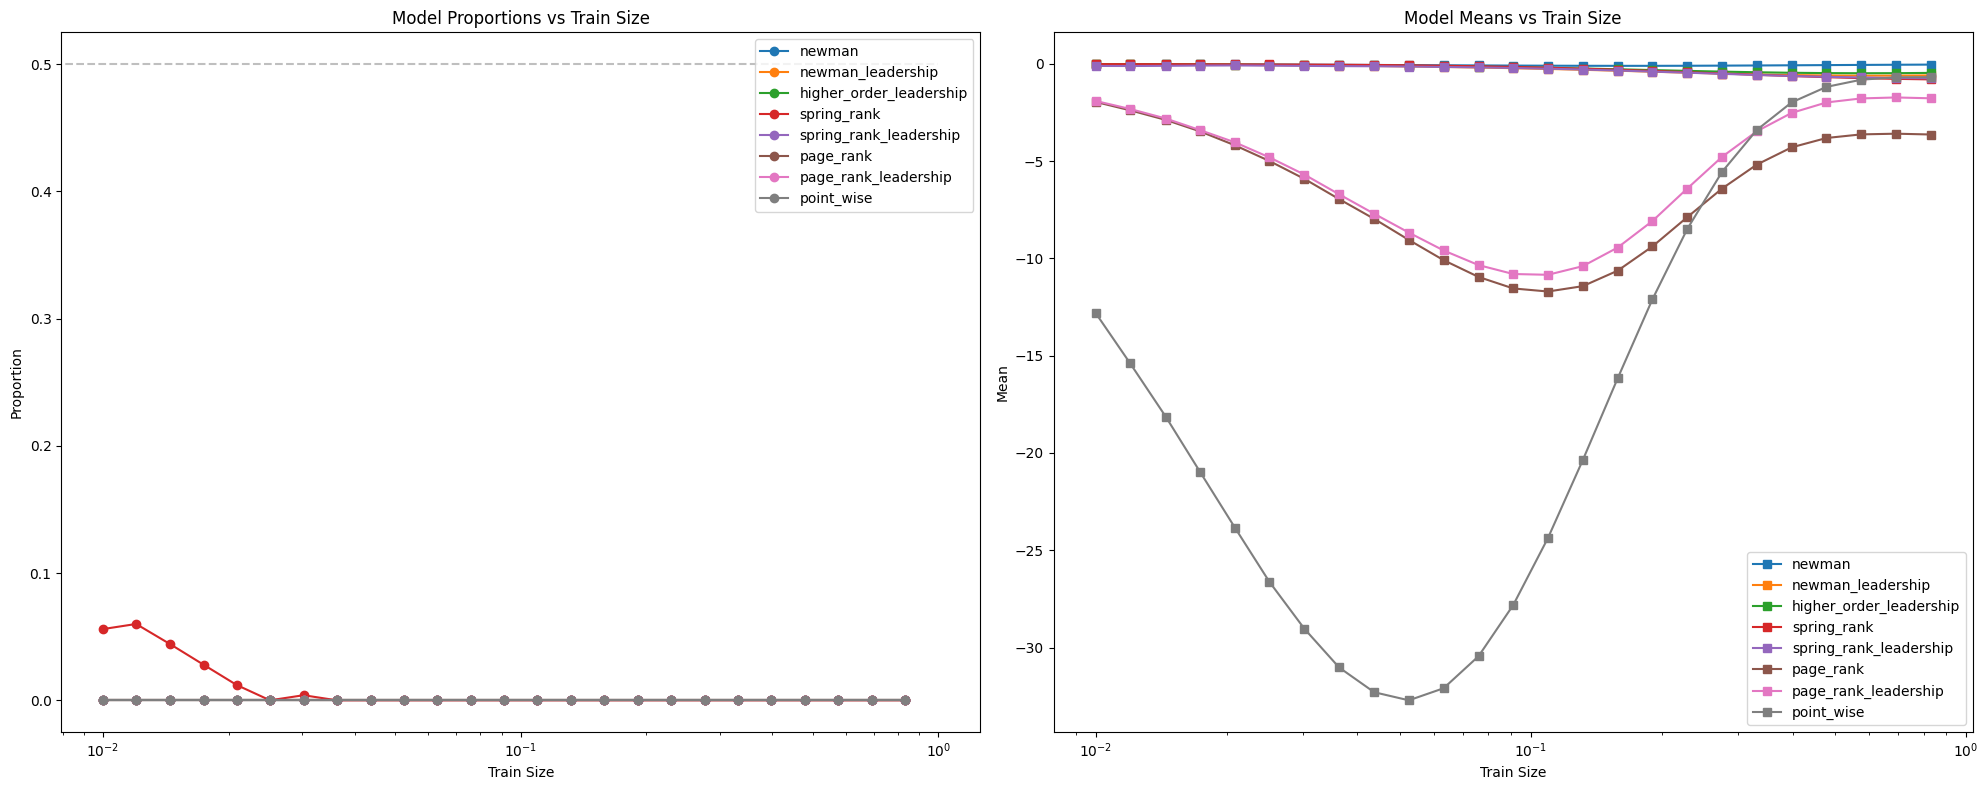

In [48]:
averages_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '01.2_results.csv'))
mean, prop = group_results_df(averages_df, 2)
plot_proportions(mean, prop)




# Higher Order Leadership

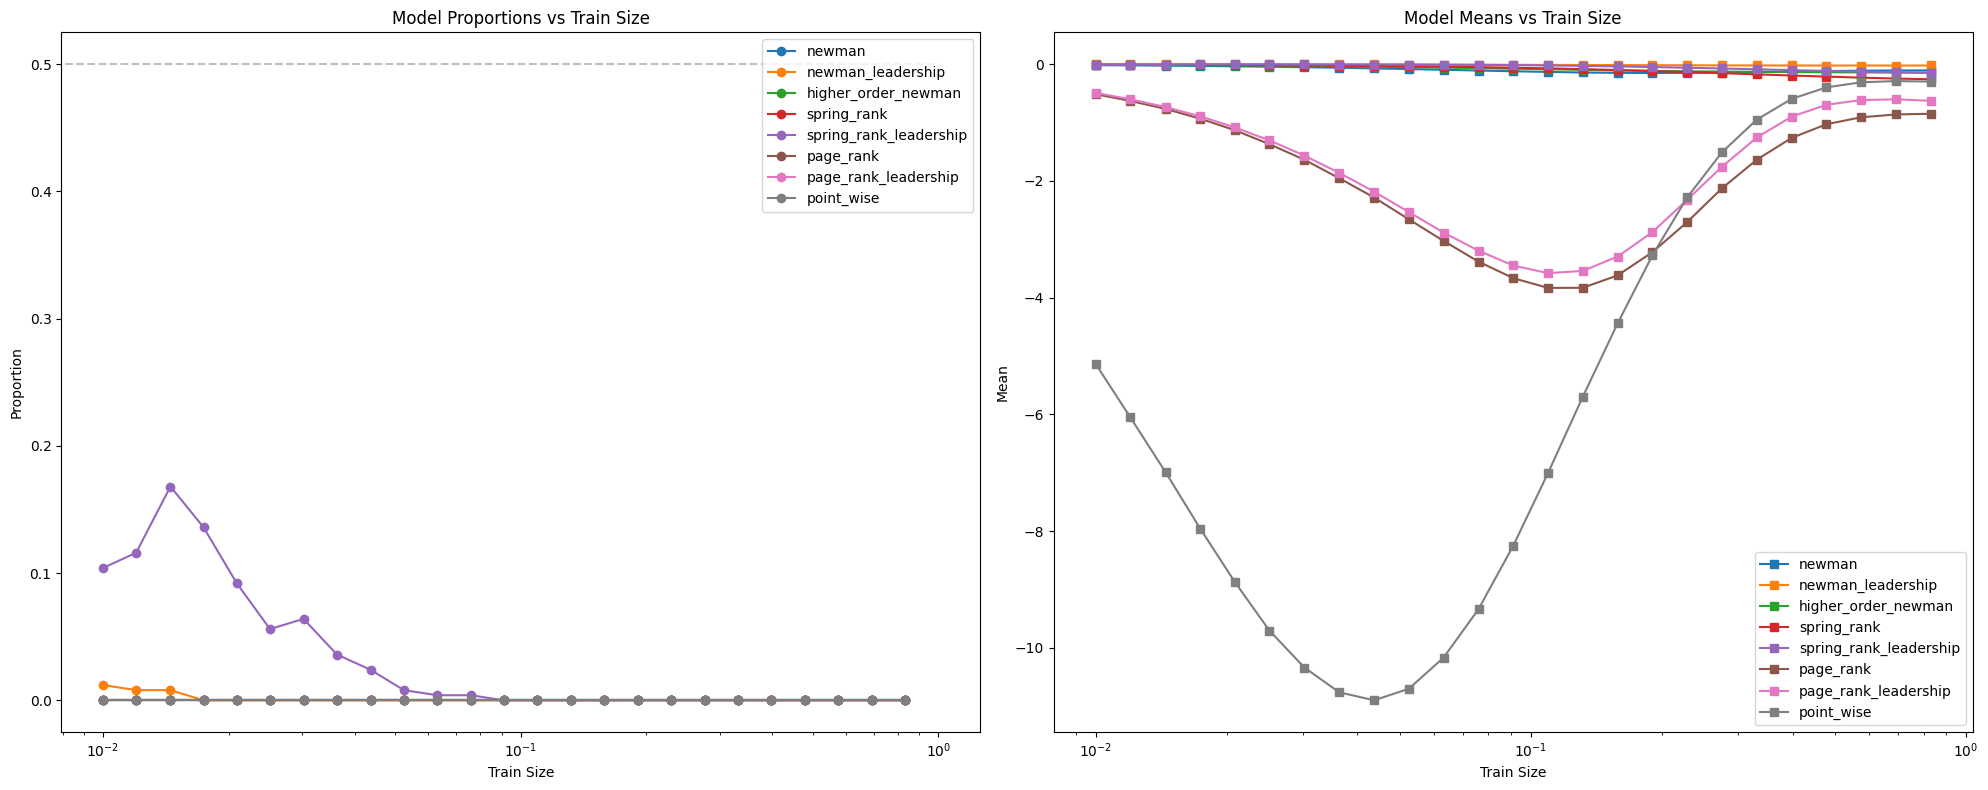

In [50]:
averages_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '01.3_results.csv'))
mean, prop = group_results_df(averages_df, 3)
plot_proportions(mean, prop)
